## Load packages and initialize styles

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Data preparation (MNIST digits dataset)

In [2]:
digits = datasets.load_digits()

# Create feature and target arrays
x = digits['data']
y = digits['target']
images = digits['images']

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

## Visualize data

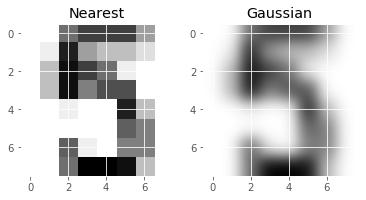

In [3]:
image5 = images[1010]
plt.subplot(1, 2, 1)
plt.imshow(image5, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Nearest')
plt.subplot(1, 2, 2)
plt.imshow(image5, cmap=plt.cm.gray_r, interpolation='gaussian')
plt.title('Gaussian')
plt.show()

## Model performance for different k for knn

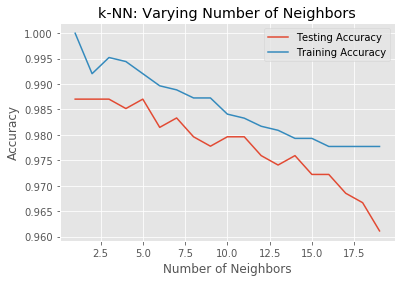

In [4]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()